In [1]:
%lsmagic

Available line magics:
%activity  %cd  %connect_info  %conversation  %dot  %download  %edit  %get  %help  %html  %include  %install  %install_magic  %javascript  %jigsaw  %kernel  %kx  %latex  %load  %ls  %lsmagic  %macro  %magic  %matplotlib  %parallel  %plot  %pmap  %px  %python  %reload_magics  %restart  %run  %scheme  %set  %shell

Available cell magics:
%%activity  %%brain  %%conversation  %%debug  %%dot  %%file  %%help  %%html  %%javascript  %%kx  %%latex  %%macro  %%pipe  %%processing  %%px  %%python  %%scheme  %%shell  %%show  %%time  %%tutor


In [2]:
%load zzwmain.m

## 自组网仿真主程序


ans =

    'OK'




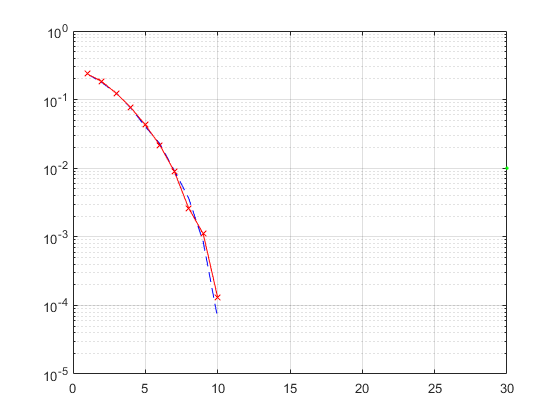

In [5]:
%matlab notebook


clear all;
close all;
sysCfg=sysCfgStr();
global puschDMRS;

%% generate DMRS
ue.NPUSCHID = 42;
ue.NDMRSID = 1;
ue.NSubframe = 0;
chs.PRBSet = (0:24).';
puschDMRS = ltePUSCHDRS(ue,chs);
DMRS=[puschDMRS(1:300).';puschDMRS(301:end).']; % only use the DMRS(1,:)

Ber=[];
for SNR=1:1:30
    for i=1:10
        BerRaw(SNR,i)=runonce('noCHE','noEQ',SNR);
        BerZF(SNR,i)=runonce('LS','ZF',SNR);
    end
    
end
b=sum(BerRaw,2)/10;
semilogy(1:30,b,'b--');hold on;
b=sum(BerZF,2)/10;
semilogy(1:30,b,'r-x');hold on;
semilogy(30:30,0.01:0.1:0.01,'g.');grid on;

%scatterplot(RxDataTd(1,:))

%a=txWaveFormWithCh(37:end);% remove CP
%a=fft(a,512);% FFT
%a=ifft(a,300);% IDFT
%scatterplot(a)
%


%'OK'